In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
def to_latex(col_names: 'List[str, ...]', cols: 'List[List, ...]', **kwargs) -> str:
    """High-level wrapper of pandas.DataFrame.to_latex with limited options.

    Zips the strings in col_names with the sublists in cols and generates a LaTeX table in string format.

    Args:
        col_names (list[str]): The names of each data column in cols. They will appear in the first row.
        cols (list[list]): Contains lists, each a supposed column of the table.

    Returns:
        str: Latex table.

    Examples:
        >>> names = ['luis', 'pablo']
        >>> cols = [list(range(10)), list(range(10))]
        >>> to_latex(names, cols)
    """
    return pd.DataFrame(dict(zip(col_names, cols))).to_latex(**kwargs)


def leastsq(x: np.ndarray, y: np.ndarray, sigma: float) -> 'tuple[[float, float], [float, float]]':
    """ Computes the least squares of the 1D vectors x and y.
    Raises:
        ValueError: If the lengths of the arrays are not equal.
        ValueError: If the array x is empty. It is checked after the lengths so y would also be empty.
    Returns:
        tuple((float, float), (float, float)): Returns a tuple containing two tuples.
            The first one contains at position 0 the slope (m in literature) and at position 1 its error.
            The second one contains at position 0 the y-intercept (b in literature) and at position 1 its error.
    """
    n = len(x)

    if n != len(y):
        raise ValueError(f'Length of the data array must be equal, length of x is {n} and y is {len(y)}. Please check. ')

    if n == 0:
        raise ValueError('Arrays cannot be empty. Please check.')

    sum_x, sum_y = np.sum(x), np.sum(y)
    sum_x2 = np.sum(x*x)
    sum_xy = np.sum(x*y)

    div = 1 / (sum_x**2 - n*sum_x2)
    m = (sum_x*sum_y - n*sum_xy) * div
    b = (sum_x*sum_xy - sum_y*sum_x2) * div

    m_e = np.sqrt(n*sigma**2 * (-1) * div)
    b_e = np.sqrt(sum_x2*sigma**2 * (-1) * div)

    return (m, m_e), (b, b_e)

#### Q11

In [38]:
v_uth = np.array((-113.4, -94.7, -74.9, -57.4, -40.2, -21.30, 0, 19.6, 39.5, 57.2, 76.7, 94.3, 113.2))  # mV
ip = np.array((-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60))  # mA


ip_err = 1
v_uth_err = 0.1

In [39]:
print(to_latex([r'$V_{UTh} 0.1 mV$', r'$I_{p} \pm 1 mA$'], [v_uth, ip], index=False, escape=False, column_format='cc'))
ms, bs = leastsq(ip, v_uth, sigma=v_uth_err)

m, m_e = ms
b, b_e = bs

print(ms, bs)

\begin{tabular}{cc}
\toprule
 $V_{UTh} 0.1 mV$ &  $I_{p} \pm 1 mA$ \\
\midrule
           -113.4 &               -60 \\
            -94.7 &               -50 \\
            -74.9 &               -40 \\
            -57.4 &               -30 \\
            -40.2 &               -20 \\
            -21.3 &               -10 \\
              0.0 &                 0 \\
             19.6 &                10 \\
             39.5 &                20 \\
             57.2 &                30 \\
             76.7 &                40 \\
             94.3 &                50 \\
            113.2 &                60 \\
\bottomrule
\end{tabular}

(1.8984065934065935, 0.0007412493166611012) (-0.10769230769231034, 0.02773500981126146)


C:\Users\luisg\AppData\Local\Temp\ipykernel_14324\3813070294.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return pd.DataFrame(dict(zip(col_names, cols))).to_latex(**kwargs)


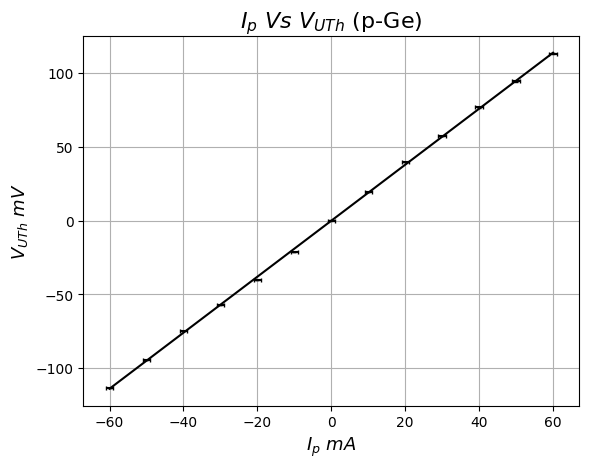

In [40]:
plt.title(r'$I_p \ Vs \ V_{UTh}$ (p-Ge)', fontsize='16')

plt.plot(ip, ip * m + b, label='Least-squares fit', color='black')
plt.errorbar(ip, v_uth, yerr=v_uth_err, xerr=ip_err, ecolor='black', capsize=1.5, linestyle='',)

plt.xlabel(r'$I_p \ mA$', fontsize='13')
plt.ylabel(r'$V_{UTh} \ mV$', fontsize='13')
# plt.xticks(rotation=45, ha="right")
# plt.legend()
plt.grid()
# plt.savefig('1-2_lstq.png')
plt.show()

#### Q2

In [44]:
v_uth = np.array((-43.9, -38.4, -32.5, -26.4, -20.2, -13.5, -6.7, 0, 0.1, 6.8, 13.4, 20, 26.2, 32.1, 37.7, 43.1))  # mV
B = np.array((-365, -315, -265, -215, -165, -115, -65, -15, 1, 50, 100, 150, 200, 250, 300, 350))  # mT

v_uth_err = 0.1
B_err = 1

In [42]:
# Reversing the sign of the power supply
# v_uth = (0, -6.7, -13.5, -20.2, -26.4, -32.5, -38.4, -43.9)
# B = (-15, -65, -115, -165, -215, -265, -315, -365)

In [45]:
print(to_latex([r'$V_{UTh} 0.1 mV$', r'$B \pm 1 mT$'], [v_uth, B], index=False, escape=False, column_format='cc'))
ms, bs = leastsq(B, v_uth, sigma=v_uth_err)

m, m_e = ms
b, b_e = bs

print(ms, bs)

\begin{tabular}{cc}
\toprule
 $V_{UTh} 0.1 mV$ &  $B \pm 1 mT$ \\
\midrule
            -43.9 &          -365 \\
            -38.4 &          -315 \\
            -32.5 &          -265 \\
            -26.4 &          -215 \\
            -20.2 &          -165 \\
            -13.5 &          -115 \\
             -6.7 &           -65 \\
              0.0 &           -15 \\
              0.1 &             1 \\
              6.8 &            50 \\
             13.4 &           100 \\
             20.0 &           150 \\
             26.2 &           200 \\
             32.1 &           250 \\
             37.7 &           300 \\
             43.1 &           350 \\
\bottomrule
\end{tabular}

(0.1239073397856672, 0.00011601927904616304) (0.7840608396559015, 0.025014887267363242)


C:\Users\luisg\AppData\Local\Temp\ipykernel_14324\3813070294.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return pd.DataFrame(dict(zip(col_names, cols))).to_latex(**kwargs)


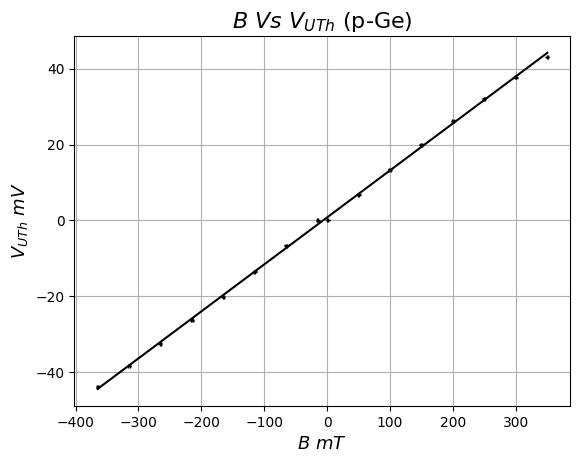

In [46]:
plt.title(r'$B \ Vs \ V_{UTh}$ (p-Ge)', fontsize='16')

plt.plot(B, B * m + b, label='Least-squares fit', color='black')
plt.errorbar(B, v_uth, yerr=v_uth_err, xerr=B_err, ecolor='black', capsize=1.5, linestyle='',)

plt.xlabel(r'$B \ mT$', fontsize='13')
plt.ylabel(r'$V_{UTh} \ mV$', fontsize='13')
# plt.xticks(rotation=45, ha="right")
# plt.legend()
plt.grid()
# plt.savefig('1-2_lstq.png')
plt.show()